# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.094807e+01     6.350062e+00
 * time: 0.004335165023803711
     1     2.744165e+01     4.856961e+00
 * time: 0.012254953384399414
     2     2.115563e+01     7.065635e+00
 * time: 0.03390812873840332
     3     1.358798e+01     2.330651e+00
 * time: 0.05837702751159668
     4     1.108715e+01     9.901282e-01
 * time: 0.07767796516418457
     5     1.081505e+01     1.620524e+00
 * time: 0.09346508979797363
     6     1.015999e+01     9.868627e-01
 * time: 0.10916709899902344
     7     9.678956e+00     1.143970e+00
 * time: 0.12489509582519531
     8     9.465710e+00     8.051149e-01
 * time: 0.1958310604095459
     9     9.450982e+00     1.201894e+00
 * time: 0.20749115943908691
    10     9.343468e+00     9.238236e-01
 * time: 0.21905899047851562
    11     9.231386e+00     6.684446e-01
 * time: 0.23067712783813477
    12     9.160650e+00     9.136641e-01
 * time: 0.2422959804534912
    13     9.127158e+00     9.348097e-01
 * time:

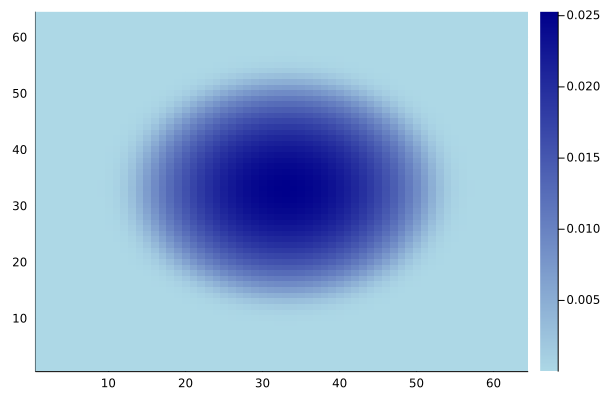

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)